<a href="https://colab.research.google.com/github/OfficialMarvin/IWT/blob/main/South_Africa_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SAlocations.csv to SAlocations.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SAincident.csv to SAincident (1).csv


In [ ]:
data = pd.read_csv("/content/SAlocations.csv") #import data
data2 = pd.read_csv("/content/SAincident.csv") #import data

In [ ]:
data = pd.merge(data2, data, on ='Report ID', how = 'left')
data

Report ID  ... Transit Type
0    MOR10070  ...          NaN
1    MOR10098  ...          NaN
2    MOR10304  ...          NaN
3    MOR10848  ...          NaN
4    MOR11473  ...          NaN
..        ...  ...          ...
500   MOR9796  ...          NaN
501   MOR9832  ...          NaN
502   MOR9849  ...      Airport
503   MOR9849  ...          NaN
504   MOR9849  ...      Airport

[505 rows x 41 columns]

In [ ]:
type(data)
data = data[data['Country'] == "South Africa"]
data = data.drop(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 504
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Report ID                                   373 non-null    object 
 1   Category of Incident_x                      373 non-null    object 
 2   Country of Incident_x                       373 non-null    object 
 3   Date of Incident_x                          373 non-null    object 
 4   Subject_x                                   373 non-null    object 
 5   Primary Source                              373 non-null    object 
 6   Source Type                                 373 non-null    object 
 7   Additional Sources                          196 non-null    object 
 8   Name of Organisation Providing Information  52 non-null     object 
 9   Transport Mode                              185 non-null    object 
 10  Where Found   

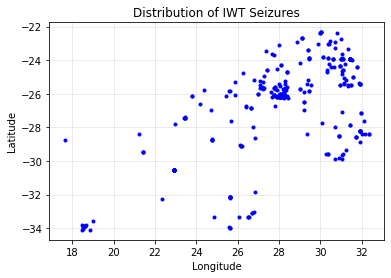

In [ ]:
_=plt.plot(data['Longitude'], data['Latitude'],
             marker='.', linewidth=0, color = '#0000FF')
_=plt.grid(which='major', color="#cccccc", alpha = .5)
_=plt.title("Distribution of IWT Seizures")
_=plt.xlabel("Longitude")
_=plt.ylabel("Latitude")
_=plt.show()

In [ ]:
dbscan_data = data[['Longitude', 'Latitude']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

Report ID  ... Transit Type
0    MOR10070  ...          NaN
1    MOR10098  ...          NaN
2    MOR10304  ...          NaN
5    MOR11473  ...          NaN
7    MOR11473  ...          NaN
..        ...  ...          ...
495   MOR9532  ...      Airport
496   MOR9532  ...      Airport
497   MOR9796  ...          NaN
501   MOR9832  ...          NaN
504   MOR9849  ...      Airport

[373 rows x 41 columns]

In [ ]:
model = DBSCAN(eps=.13,min_samples=6,metric='euclidean').\
fit(dbscan_data)
model

DBSCAN(algorithm='auto', eps=0.13, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [ ]:
outliers_df = data[model.labels_ == -1]
clusters_df = data[model.labels_ != -1]
colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = "white"
clusters = Counter(model.labels_)
print(clusters)
print(data[model.labels_ == -1].head())
print("num of clusters = {}".format(len(clusters)-1))

Counter({-1: 114, 0: 114, 2: 65, 1: 38, 4: 13, 3: 11, 5: 6, 7: 6, 6: 6})
   Report ID            Category of Incident_x  ...  Longitude     Transit Type
0   MOR10070                        1. Seizure  ...  29.202778              NaN
1   MOR10098  2. Poaching / Illegal Harvesting  ...  31.765827              NaN
19  MOR11792                        1. Seizure  ...  31.070345  Border Crossing
24  MOR12241                        1. Seizure  ...  24.729861              NaN
25  MOR12312                        1. Seizure  ...  30.393915              NaN

[5 rows x 41 columns]
num of clusters = 8


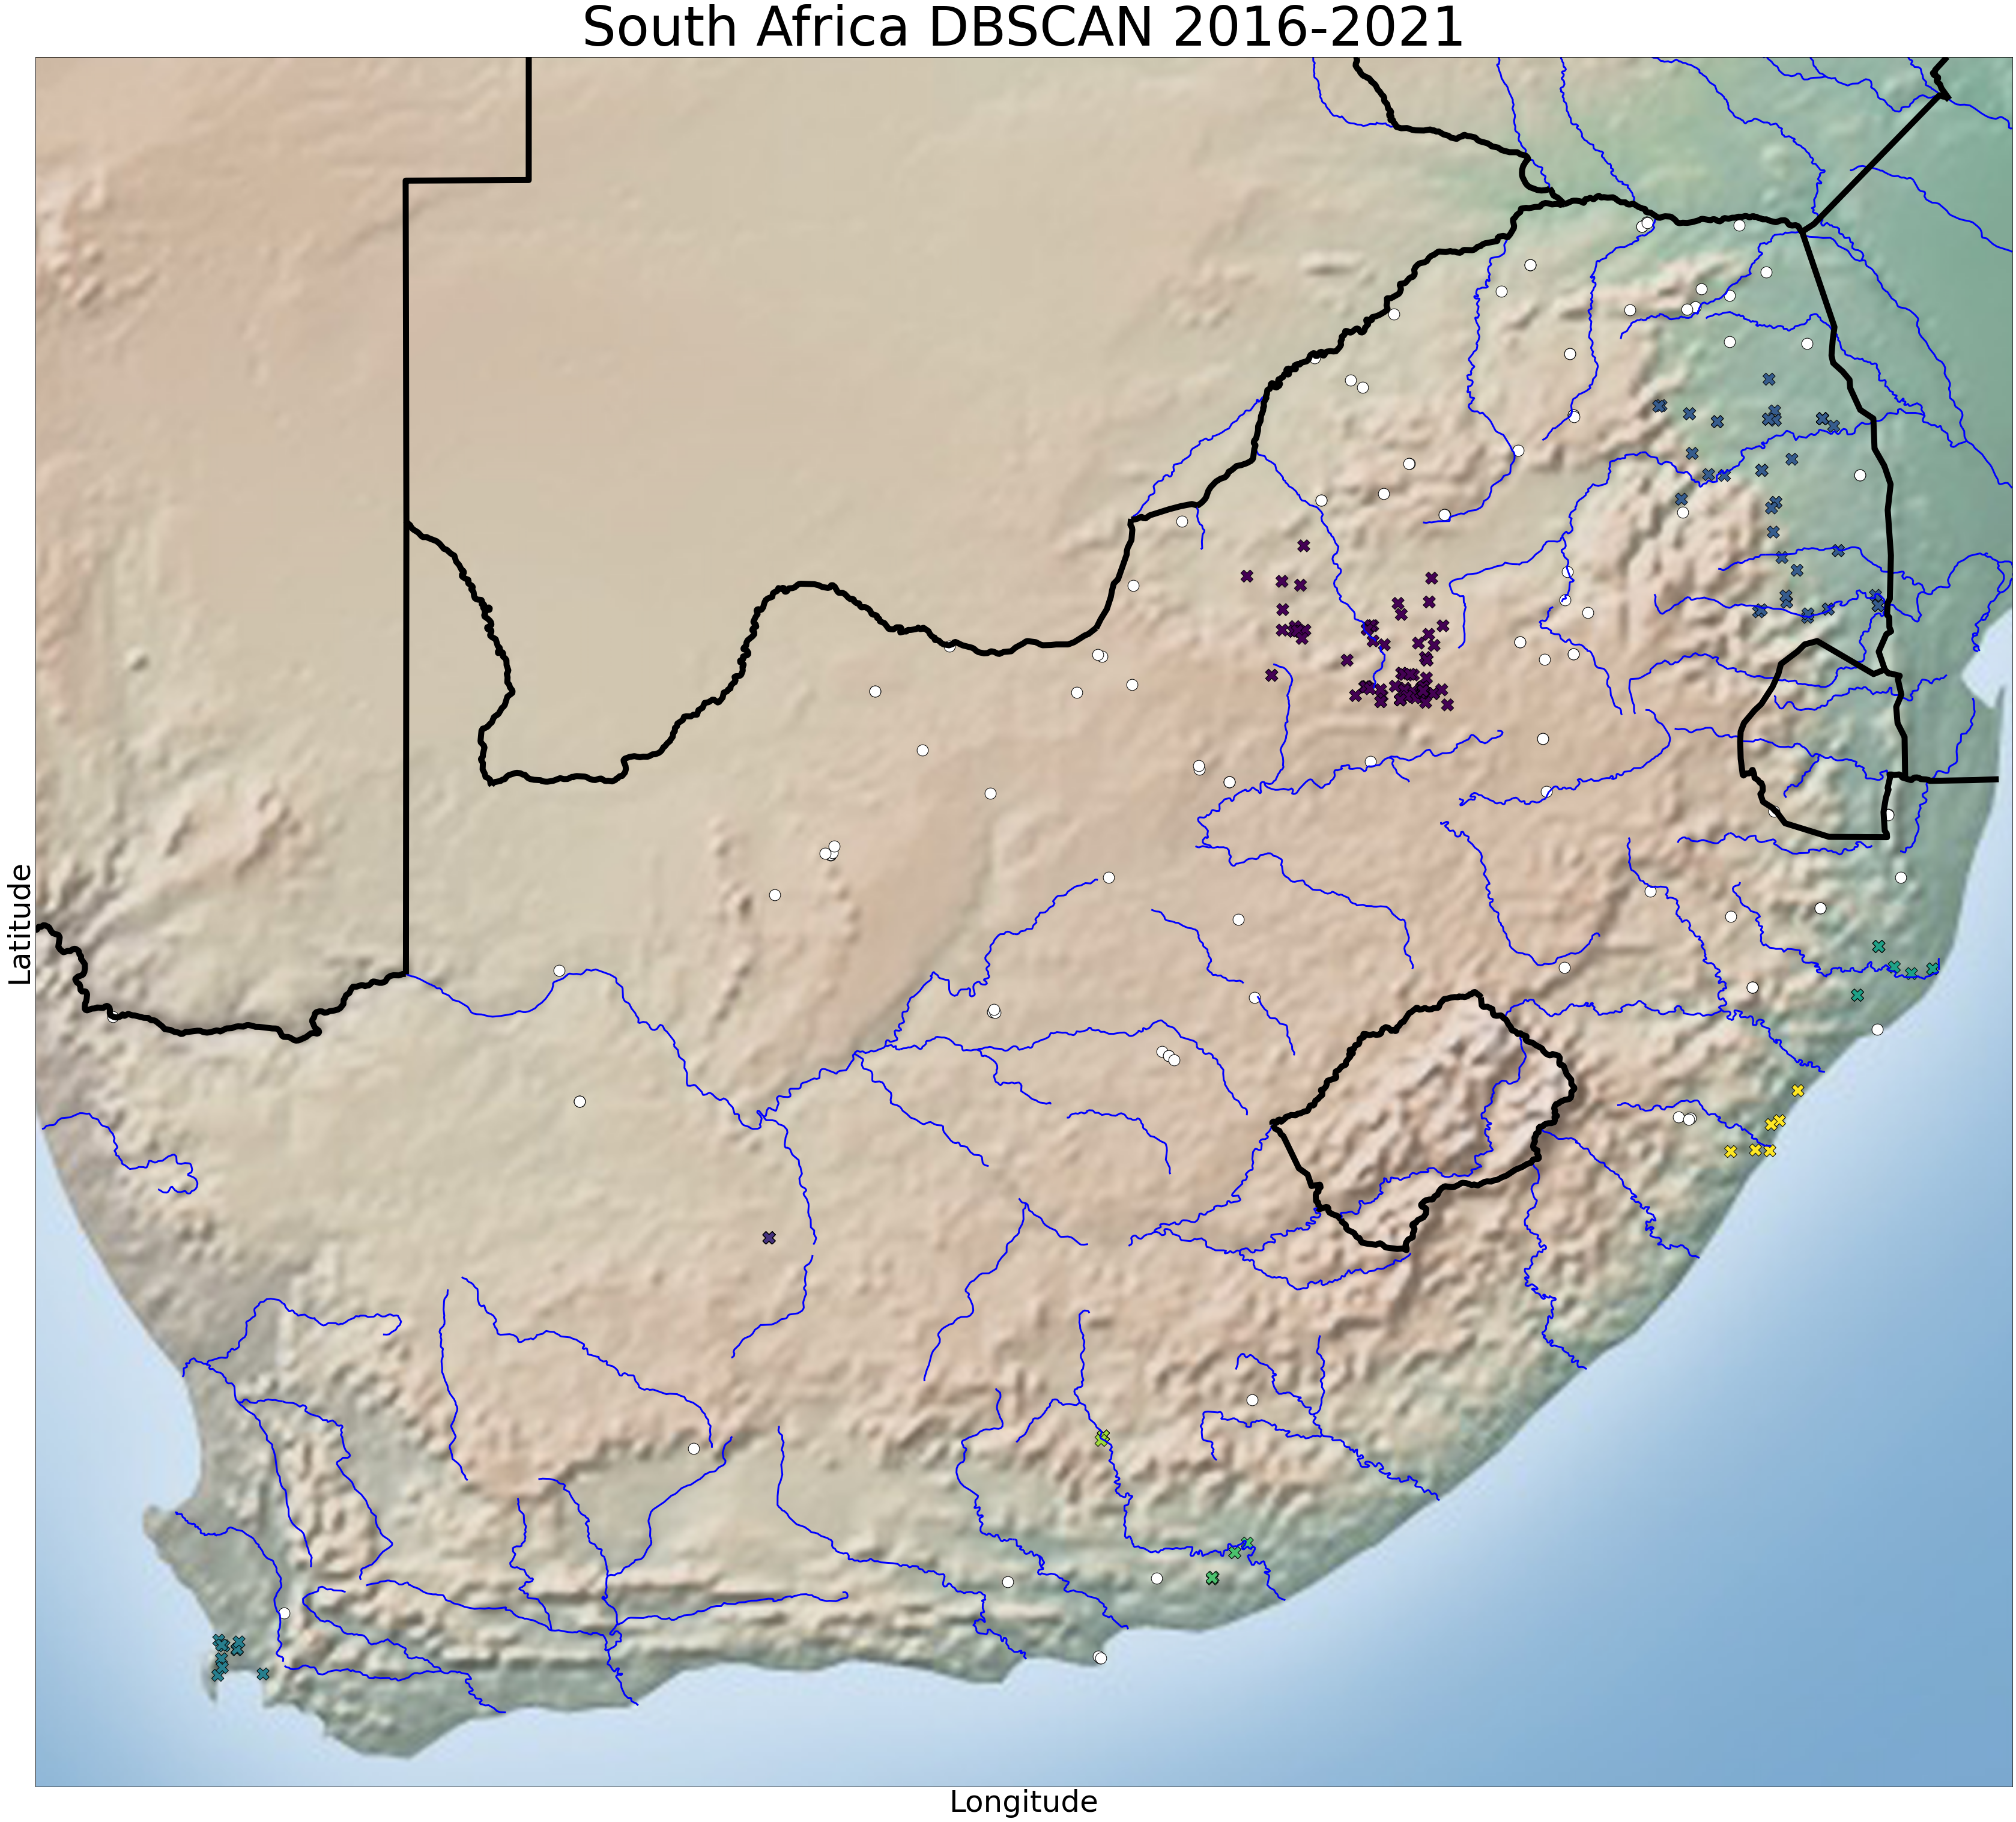

In [ ]:

fig = plt.figure()
ax = fig.add_axes([1,1,10,10])
m = Basemap(projection= "cyl", llcrnrlon=17,llcrnrlat=-35,urcrnrlon=33,urcrnrlat=-21, resolution= "h")
m.drawrivers(linewidth=3,color="blue")
m.shadedrelief(scale=3)
m.drawcountries(linewidth=10)
ax.scatter(clusters_df['Longitude'], clusters_df['Latitude'],
           c = colors_clusters, edgecolors = 'black', s=420,marker="X", urls=clusters_df['Primary Source'])
ax.scatter(outliers_df['Longitude'], outliers_df['Latitude'],
           c = color_outliers, edgecolors = 'black', s=350)
ax.set_xlabel('Longitude', fontsize=50)
ax.set_ylabel('Latitude',  fontsize=50)
plt.title("South Africa DBSCAN 2016-2021", fontsize=90)
plt.grid(which='major',color="#cccccc", alpha=.0)
plt.show()


In [ ]:
short = data[['Longitude', 'Latitude','Number of People Charged', 'Primary Source']]
print(short.to_string())

      Longitude   Latitude  Number of People Charged                                                                                                                                                                                                                                                   Primary Source
0     29.202778 -26.516111                       NaN                                                                                                                                                                                                                   http://allafrica.com/stories/201604060422.html
1     31.765827 -24.384226                       1.0                                                                                                                                                                                                    https://www.saps.gov.za/newsroom/msspeechdetail.php?nid=12604
2     28.315287 -26.153149                       NaN                  

Manually update number charged via URLs

Use GIS program to spatial join Long/Lang with shapefile of areas with developed buildings in South Africa

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


Saving SA_Pnts.csv to SA_Pnts.csv


In [5]:
import pandas as pd
df = pd.read_csv("/content/SA_Pnts.csv")

In [6]:
urban = df.loc[df['BUFF_DIST'] == 1]
urban["Number"].mean()

2.5035971223021583

In [7]:
rural = df.loc[df['BUFF_DIST'] == 0]
rural["Number"].mean()

3.262135922330097